In [76]:
import pandas as pd

df = pd.read_csv('Pima.csv', names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Label'])
assert df.shape[0] == 768
assert len(df.columns) == 9
print('Successfully verified 768 rows and 9 columns!')
df

Successfully verified 768 rows and 9 columns!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [77]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

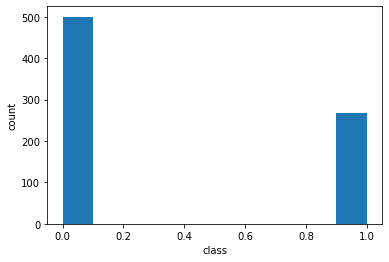

In [78]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.xlabel('class')
plt.ylabel('count')
plt.hist(df['Label'])
# val_counts = np.unique(df['Label'], return_counts=True)
# x = val_counts[0]
# y = val_counts[1]

# counts, bins = np.histogram(df['Label'])
# print(counts, bins)
#
# # plt.hist(x=counts, bins=bins)
# plt.stairs(counts, bins)

## Question 3

In [79]:
from sklearn.model_selection import train_test_split

y = df['Label']
X = df.drop(columns=['Label'])
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

k=1 score=0.6449020391843263
k=2 score=0.6921764627482341
k=3 score=0.6937758230041318
k=4 score=0.7003198720511795
k=5 score=0.7051979208316673
k=6 score=0.6840863654538184
k=7 score=0.6971078235372518
k=8 score=0.7134346261495401
k=9 score=0.6938557910169265
k=10 score=0.7085699053711847
k=11 score=0.7069305611088896
k=12 score=0.7329734772757563
k=13 score=0.7101692656270825
k=14 score=0.7231640677062509
k=15 score=0.7133946421431427
[0.6449020391843263, 0.6921764627482341, 0.6937758230041318, 0.7003198720511795, 0.7051979208316673, 0.6840863654538184, 0.6971078235372518, 0.7134346261495401, 0.6938557910169265, 0.7085699053711847, 0.7069305611088896, 0.7329734772757563, 0.7101692656270825, 0.7231640677062509, 0.7133946421431427]
best k=12
best test k=15


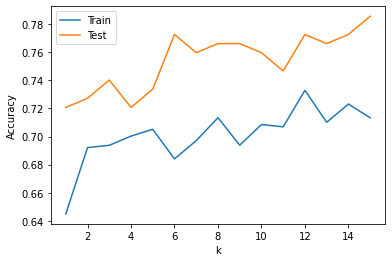

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

avg_scores = []
test_scores = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=X_train, y=y_train)
    avg_score = np.mean(scores)
    avg_scores.append(avg_score)
    print(f'k={k} score={avg_score}')

    # check
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    test_scores.append(score)
    # print(f'=====> k={k} test_score={score}')
    # end check

print(avg_scores)
best_k = np.argmax(avg_scores) + 1
print(f'best k={best_k}')

best_test_k = np.argmax(test_scores) + 1
print(f'best test k={best_test_k}')

x = range(1, 16)
y = avg_scores
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(x, y)

y = test_scores
plt.plot(x, y)
plt.legend(['Train', 'Test'])

In [81]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'k={best_k} test_error={1-score}')

k=12 test_error=0.2272727272727273


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(X_train.shape, X_test.shape)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

knn.fit(X_train_norm, y_train)
score = knn.score(X_test_norm, y_test)
print(f'k={best_k} standardized test_error={1-score}')

(614, 8) (154, 8)
k=12 standardized test_error=0.20779220779220775


## Q4
- Yes, centralization and standardization affects the data.
- This is because KNN uses raw feature values, hence if some value is much larger than the others, it would dominate the outcome. We can clearly see values of the feature "Insulin" is much higher than "DPF", thus without normalization "Insulin" would have higher weightage. If such scale difference is not desirable, normalization would give better results.